<a href="https://colab.research.google.com/github/412Amit/Unemployement-in-india/blob/main/Credit_Card_Fraud_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fraudulent credit card transactions are a significant challenge for financial institutions and consumers alike. Detecting these fraudulent activities in real-time is important to prevent financial losses and protect customers from unauthorized charges.

In this article we will explore how to build a machine learning model to detect fraudulent credit card transactions using Python

Step 1: Importing all the necessary Libraries
We begin by importing the necessary Python libraries: numpy, pandas, matplotlib and seaborn for data handling, visualization and model building.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


Step 2: Loading the Data
Load the dataset into a pandas DataFrame and examine its structure.

In [ ]:
data = pd.read_csv("/content/creditcard.csv")
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

let’s explore more about the dataset using df.describe() method.

In [ ]:
print(data.describe())

               Time            V1            V2            V3            V4  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean    8009.996822     -0.216230      0.277097      0.889505      0.282606   
std     6204.332248      1.583914      1.308884      1.331824      1.478162   
min        0.000000    -27.670569    -34.607649    -22.804686     -4.657545   
25%     2542.000000     -0.978944     -0.261503      0.417186     -0.622456   
50%     6662.000000     -0.340742      0.256346      0.951223      0.213029   
75%    12382.000000      1.161273      0.883626      1.613678      1.159141   
max    20642.000000      1.960497      9.092123      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean      -0.086585      0.139986     -0.121943     -0.048727      0.911579   
std        1.191776      1.306285      1.153899    

Step 3: Analyze Class Distribution

The next step is to check the distribution of fraudulent vs. normal transactions.

In [ ]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.004367545775239375
Fraud Cases: 52
Valid Transactions: 11906


Step 4: Visualize Transaction Amounts

Let’s compare the transaction amounts for fraudulent and normal transactions. This will help us understand if there are any significant differences in the monetary value of fraudulent transactions.

In [ ]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,52.000000
mean,97.724808
std,321.188775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.772500
max,1809.680000


In [ ]:
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,11906.000000
mean,62.198127
std,177.379105
min,0.000000
25%,5.292500
50%,15.950000
75%,50.000000
max,7712.430000


Step 5: Correlation Matrix

We can visualize the correlation between features using a heatmap. This will give us an understanding of how the different features are correlated and which ones may be more relevant for prediction.

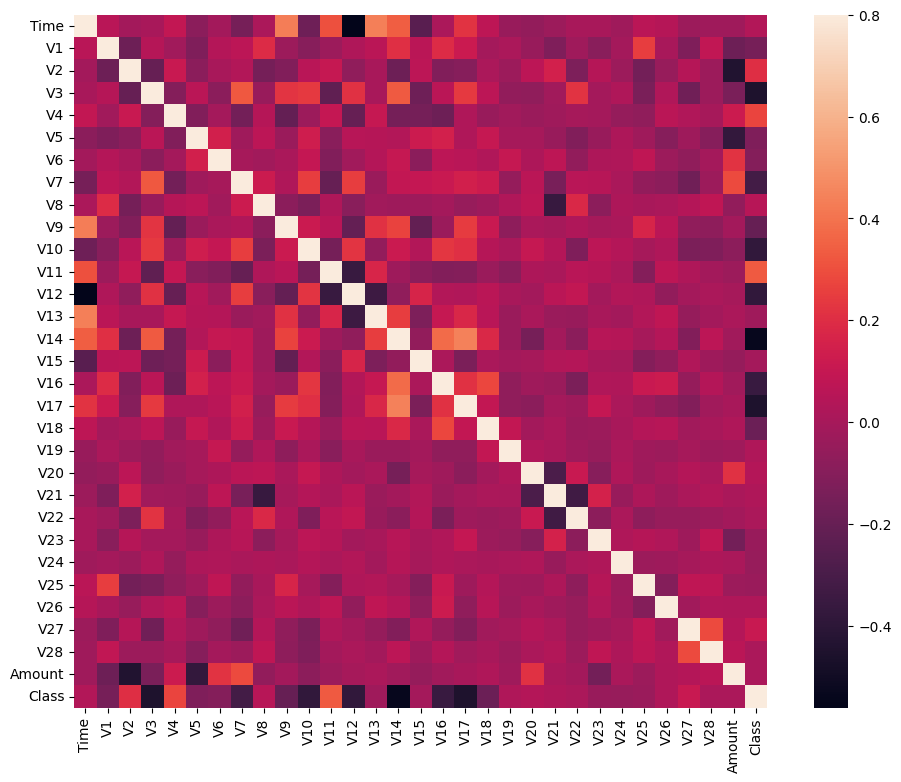

In [ ]:
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

Step 6: Prepare the Data
Separate the input features (X) and target variable (Y), then split the data into training and testing sets

In [ ]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)


(11959, 30)
(11959,)


Step 7: Build and Train the Model
Train a Random Forest Classifier to predict fraudulent transactions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

Step 8: Handling Missing Values
Before proceeding with model evaluation, it’s important to ensure that the dataset does not contain any missing or invalid values (e.g., NaN).

If your dataset contains missing values in the target variable (yTest), you can use the SimpleImputer from sklearn.impute to handle them

In [ ]:
from sklearn.impute import SimpleImputer
print("NaN values in yTest before imputation:", np.isnan(yTest).sum())

imputer = SimpleImputer(strategy='most_frequent')
yTest = imputer.fit_transform(yTest.reshape(-1, 1)).flatten()
print("NaN values in yTest after imputation:", np.isnan(yTest).sum())

NaN values in yTest before imputation: 1
NaN values in yTest after imputation: 0


Step 9: Evaluate the Model
After training the model, we need to evaluate its performance using various metrics, such as accuracy, precision, recall, F1-score, and the Matthews correlation coefficient.

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 1.0000
Recall: 0.9000
F1-Score: 0.9474
Matthews Correlation Coefficient: 0.9485


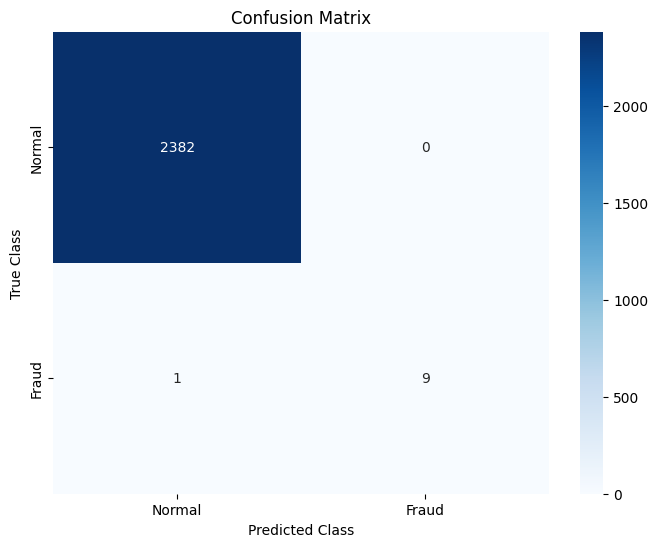

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix # Evaluation metrics
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

# Confusion matrix
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()